In [320]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from mycolorpy import colorlist as mcp

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

from random import seed
from random import randrange

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [321]:
#An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5).
#After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.Content 
#In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
#Then, they performed segmented outreach and communication for different segment of customers.
#This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
#You are required to help the manager to predict the right group of the new customers.#

In [322]:
data=pd.read_csv("customersegmentation.csv")

In [323]:
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D


In [324]:
data.shape

(10695, 11)

In [325]:
# Looking for missing values in dataset

data.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [326]:
data = data.dropna()
data.shape

(8819, 11)

In [327]:
data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Gender Data Visualisation

In [328]:
data['Gender'].dtype

dtype('O')

In [329]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [330]:
data['Gender'].value_counts()

Male      4861
Female    3958
Name: Gender, dtype: int64

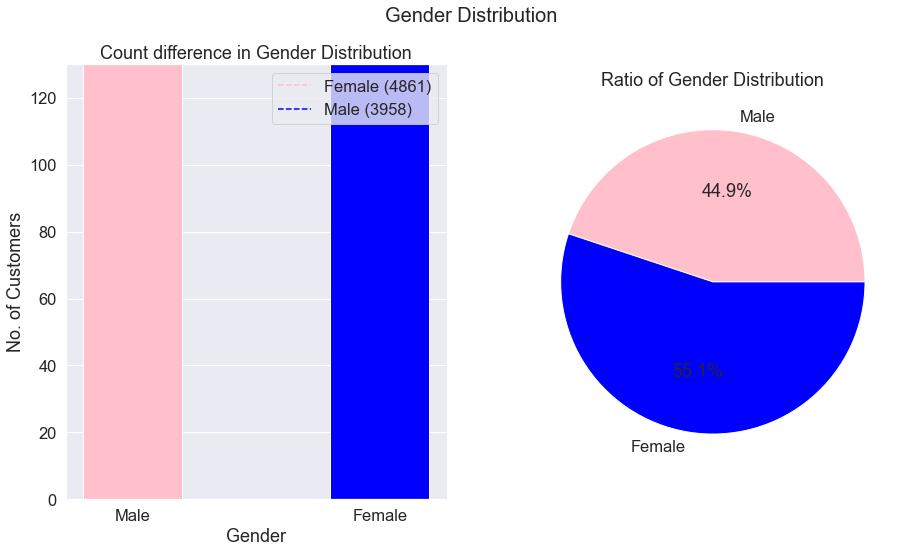

In [331]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['pink','blue'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='pink', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='blue', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['pink','blue'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=20);
plt.show()

In [332]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

Age Data Visualisation

In [333]:
data['Age'].describe()

count    8819.000000
mean       43.517859
std        16.581537
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

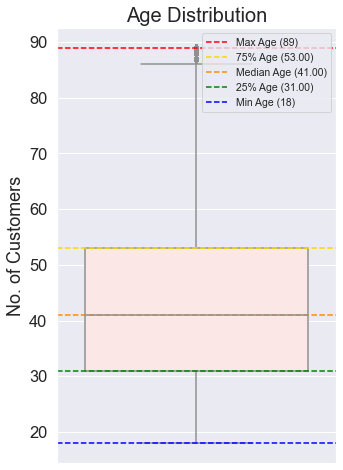

In [334]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="mistyrose")
ax.axhline(y=data['Age'].max(), linestyle='--',color='red', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='gold', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='darkorange', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='green', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='blue', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

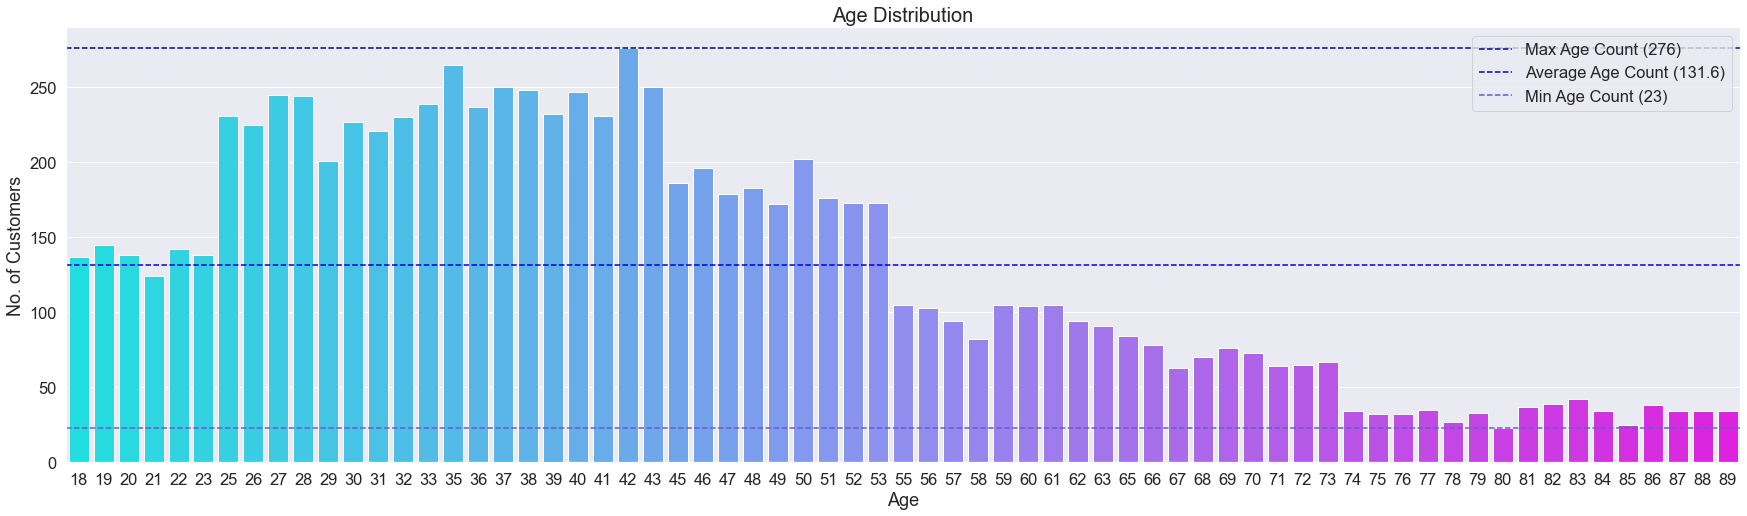

In [335]:
fig, ax = plt.subplots(figsize=(30,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='cool')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='darkblue', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='mediumblue', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='slateblue', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Profession Data Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

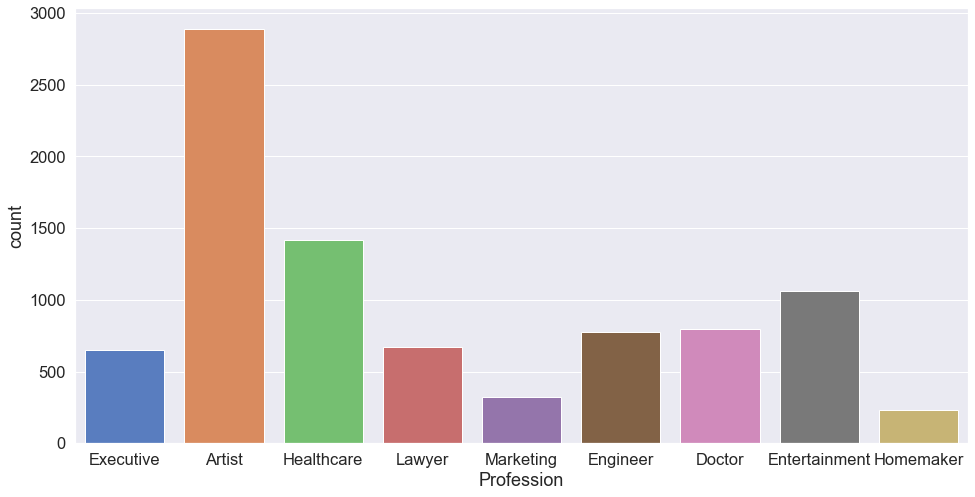

In [336]:
plt.figure(figsize=(16,8))
sns.countplot(data.Profession,palette='muted')

In [337]:
profession=pd.get_dummies(data.Profession)
data.drop(['Profession'],axis=1,inplace=True)
data=data.join(profession)

Graduated Data Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Graduated', ylabel='count'>

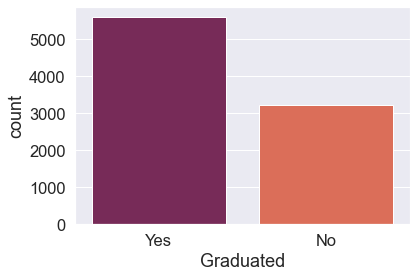

In [338]:
sns.countplot(data.Graduated,palette='rocket')

In [339]:
data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

Spending Score Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

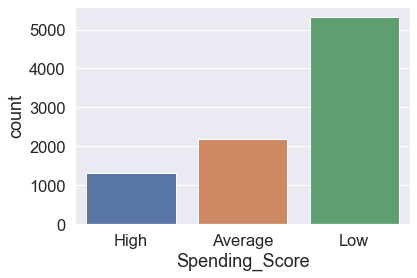

In [340]:
sns.countplot(data.Spending_Score)

In [341]:
data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

Var_1 Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Var_1', ylabel='count'>

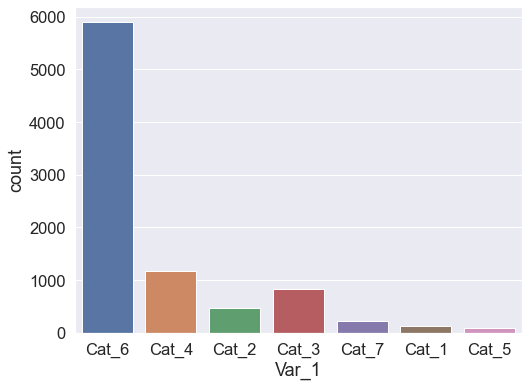

In [342]:
#Var_1 is income range attribute with cat_1 being the highest paid and cat_6 being the lowest paid

plt.figure(figsize=(8,6))
sns.countplot(data.Var_1)

In [343]:
data.Var_1=pd.Categorical(data.Var_1).codes

Marital Status Data Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

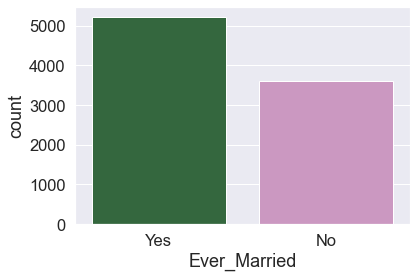

In [344]:
sns.countplot(data.Ever_Married,palette='cubehelix')

In [345]:
data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

Work Experience Data Visualisation

(array([5729.,  337.,  631.,  248.,  242.,  771.,  569.,  121.,   55.,
         116.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

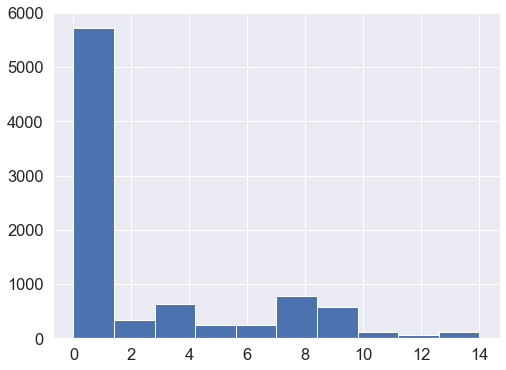

In [346]:
plt.figure(figsize=(8,6))
plt.hist(data.Work_Experience)

label=pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes
data.drop(['Segmentation'],axis=1,inplace=True)
label

In [347]:
correlation_data=pd.DataFrame(data)
correlation_data.drop(['ID'],axis=1,inplace=True)
correlation_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,C,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,C,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,C,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,1,1,43,1,0.0,1,2.0,5,C,1,0,0,0,0,0,0,0,0
10691,1,0,31,1,1.0,0,4.0,5,D,1,0,0,0,0,0,0,0,0
10692,0,0,22,0,1.0,0,3.0,5,D,1,0,0,0,0,0,0,0,0
10693,1,1,66,1,0.0,1,3.0,5,A,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

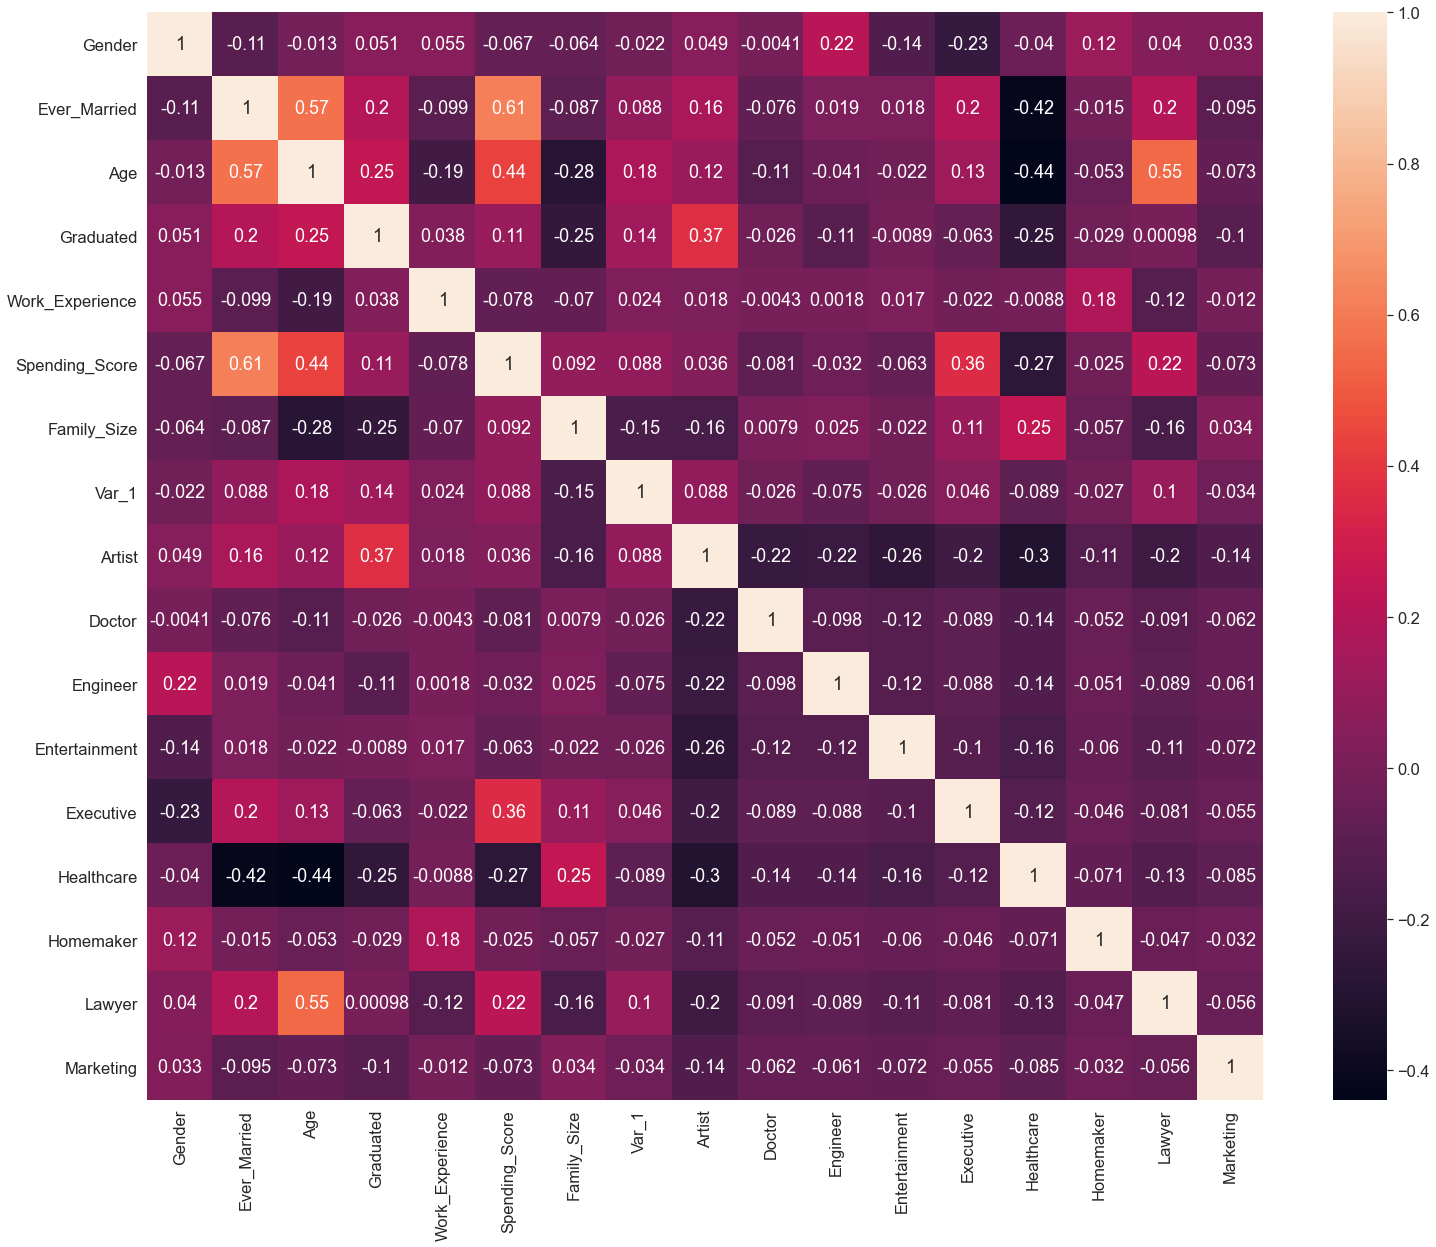

In [348]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_data.corr(),annot=True)

In [351]:
# Generic function to compoute Principal Component Analysis (PCA) for dimensionality reduction
def principalComponentAnalysis(data, n_components):

    # Mean centering the data 
    X_mean = data - np.mean(data , axis = 0)

    # Calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_mean , rowvar = False)

    # Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_vals , eigen_vecs = np.linalg.eigh(cov_mat)

    # Sort the eigenvalues in descending order
    sorted_vec = np.argsort(eigen_vals)[::-1]
    
    sorted_eigenvalue = eigen_vals[sorted_vec]
    
    # Similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vecs[:,sorted_vec]

    # Select the first n eigenvectors, n is desired dimension of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

    # Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
    
    return X_reduced

# Calculating cost function for various values of k
def cost_function(data, trials=1):
    costs = []
    scores = []
    # Run the loop for the number of trials
    for i in range(2,trials):
        # Initialize K means with different values of k
        kmeans = k_means(k=i)
        kmeans.model_fit(data)
        
        cluster_assignments = kmeans.centroids
        
        # Calculate the distance from their respective centroides for evaluation purposes
        cost = 0
        for cluster in cluster_assignments:
            for feature in kmeans.classifications[cluster]:
                dist = np.linalg.norm(feature - cluster_assignments[cluster])**2
                cost += dist
        costs.append(np.array(cost))
        
        # Calculate the silhoutte score
        scores.append(silhouette_score(data, kmeans.model_predict(data), metric='euclidean'))

    # Return cost and scores arrays
    return costs, scores

# Split a dataset into a train and test set
def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

# DBScan

Author: Jinrong

In [352]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,458982,0,1,61,1,1.0,2,3.0,5,C,0,0,0,0,1,0,0,0,0
1,458983,1,1,63,1,0.0,2,5.0,5,C,0,0,0,0,1,0,0,0,0
2,458984,0,1,39,1,0.0,1,3.0,5,C,1,0,0,0,0,0,0,0,0
3,458985,0,0,23,0,1.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
4,458986,0,0,18,0,7.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0


In [353]:
df_clean = data.drop(columns=['ID'])
df_clean.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,C,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,C,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,C,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,D,0,0,0,0,0,1,0,0,0


In [354]:
df_clean.dtypes

Gender                int8
Ever_Married          int8
Age                  int64
Graduated             int8
Work_Experience    float64
Spending_Score        int8
Family_Size        float64
Var_1                 int8
Segmentation        object
Artist               uint8
Doctor               uint8
Engineer             uint8
Entertainment        uint8
Executive            uint8
Healthcare           uint8
Homemaker            uint8
Lawyer               uint8
Marketing            uint8
dtype: object

In [355]:
cat_cols = df_clean.select_dtypes('object').columns
num_cols = df_clean.select_dtypes('float64').columns
df_clean[cat_cols] = df_clean[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean[num_cols] = df_clean[num_cols].apply(lambda x: x.fillna(x.mean()))

In [356]:
df_clean.isna().mean()

Gender             0.0
Ever_Married       0.0
Age                0.0
Graduated          0.0
Work_Experience    0.0
Spending_Score     0.0
Family_Size        0.0
Var_1              0.0
Segmentation       0.0
Artist             0.0
Doctor             0.0
Engineer           0.0
Entertainment      0.0
Executive          0.0
Healthcare         0.0
Homemaker          0.0
Lawyer             0.0
Marketing          0.0
dtype: float64

In [357]:
df_dummy = pd.get_dummies(df_clean.drop(columns='Segmentation'), drop_first=True)
df_dummy.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,1,61,1,1.0,2,3.0,5,0,0,0,0,1,0,0,0,0
1,1,1,63,1,0.0,2,5.0,5,0,0,0,0,1,0,0,0,0
2,0,1,39,1,0.0,1,3.0,5,1,0,0,0,0,0,0,0,0
3,0,0,23,0,1.0,0,4.0,5,0,0,0,0,0,1,0,0,0
4,0,0,18,0,7.0,0,4.0,5,0,0,0,0,0,1,0,0,0


In [358]:
class DBScan():
    def __init__(self, eps, min_samples=5):        
        self.eps = eps # maximum distance between neighbor
        self.min_samples = min_samples # minimum number of neighbors        
        
    # this function calcualte distance between all pairs
    def find_distances(self, X):
        return ((X[:,None,:] - X[None,:,:])**2).sum(axis=2)**0.5
        
    # return the indices of neighbors for specific observation
    def find_neightbors(self, i):
        return set(np.where(self.D[i] < self.eps)[0])
        
    # find clusters
    def fit(self, X):
        
        # calculate all pairwise distances
        self.D = self.find_distances(X)
        
        m = X.shape[0]
        labels_ = [-1]*m
        c = -1
        
        # go over each observation
        for i in range(m):
            
            # if it is undefined
            if labels_[i] == -1:
                
                # find all neighbors of the current node
                neighbors = self.find_neightbors(i)
                
                # if there are few than min_samples neighbors
                # label the node as noise
                if len(neighbors) < self.min_samples:
                    labels_[i] = -2
                    continue
                c += 1
                
                # assgin it to a new cluster
                labels_[i] = c
                
                # label all neighbors to the same cluster
                for x in neighbors:
                    labels_[x] = c
                
                # go over each neighbor
                while neighbors:
                    q = neighbors.pop()
                    labels_[q] = c
                    
                    # find neighbor of neighbors
                    new = self.find_neightbors(q)  
                    # if new neighbor are within the limit
                    if len(new) > self.min_samples:
                        # add new neighbors to the list
                        for x in new:
                            if x not in neighbors and labels_[x] in {-1,-2}:
                                neighbors.add(x)
        # store the final results               
        self.labels_ = labels_

In [359]:
sc = StandardScaler()

X_scaled = df_dummy.copy()
X_scaled[:] = sc.fit_transform(df_dummy)

In [360]:
eps_val = np.arange(4, 13, 1)
n_cluster = []
for eps in eps_val:
    print(eps)
    dbscan = DBScan(eps=eps)
    dbscan.fit(X_scaled.values)
    n_cluster.append(len(set(dbscan.labels_)))

4
5
6
7
8
9
10
11
12


In [361]:
print(eps_val)
print(n_cluster)

[ 4  5  6  7  8  9 10 11 12]
[8, 3, 2, 1, 1, 1, 1, 1, 1]


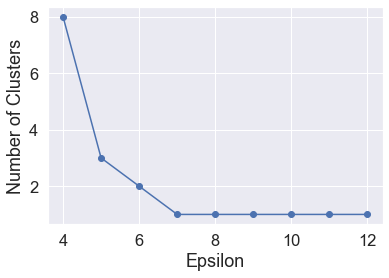

In [362]:
plt.plot(eps_val, n_cluster, 'bo-')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters');

In [363]:
dbscan = DBScan(eps=4.35)
dbscan.fit(X_scaled.values)

In [364]:
pd.Series(dbscan.labels_).value_counts()

1    7613
0     652
2     325
3     229
dtype: int64

In [365]:
pd.crosstab(np.array(dbscan.labels_), data['Segmentation'])

Segmentation,A,B,C,D
row_0,,,,
0,245,149,164,94
1,3285,1355,1508,1465
2,138,24,29,134
3,102,44,19,64


In [366]:
adjusted_rand_score(data['Segmentation'], dbscan.labels_)

0.004704905550590988

In [367]:
X_pca = pca.fit_transform(X_scaled)

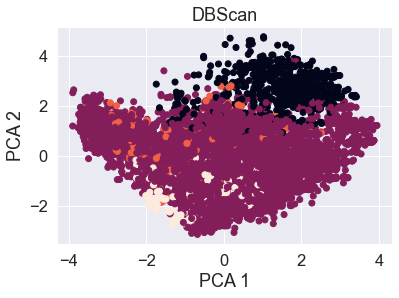

In [368]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)
plt.title('DBScan')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');